###This is an analysis of the 2012 election using data from the HuffPost Pollster. It will look at:
* The number of voters in favor of Obama, Romney, or who are undecided
* How voters polled regarding Obama v. Romney from 2009 to 2012
* Voter sentiment after each of the three debates
* The average donation amount
* Total contribution amount given to each candidate
* Total contribution amount given to each party
* Number of contributions grouped by occupation and party

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import requests
from StringIO import StringIO

In [5]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
poll_data = StringIO(source)

In [6]:
poll_df = pd.read_csv(poll_data)

In [7]:
poll_df.info

<bound method DataFrame.info of                                 Pollster  Start Date    End Date  \
0              Politico/GWU/Battleground  2012-11-04  2012-11-05   
1                             UPI/CVOTER  2012-11-03  2012-11-05   
2                       Gravis Marketing  2012-11-03  2012-11-05   
3                   JZ Analytics/Newsmax  2012-11-03  2012-11-05   
4                              Rasmussen  2012-11-03  2012-11-05   
5                               IBD/TIPP  2012-11-03  2012-11-05   
6                       YouGov/Economist  2012-11-03  2012-11-05   
7                    Ipsos/Reuters (Web)  2012-11-01  2012-11-05   
8                                    ARG  2012-11-02  2012-11-04   
9                                    CNN  2012-11-02  2012-11-04   
10   PPP (D-Americans United for Change)  2012-11-02  2012-11-04   
11                                Gallup  2012-11-01  2012-11-04   
12                   Democracy Corps (D)  2012-11-01  2012-11-04   
13              

In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [13]:
avg = pd.DataFrame(poll_df.mean())

In [14]:
avg.drop('Number of Observations', axis=0, inplace=True)

In [17]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

In [18]:
std.head()

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


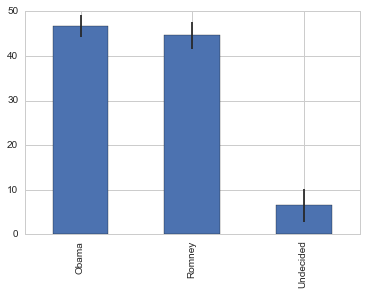

In [19]:
avg.plot(yerr=std, kind='bar', legend=False)

##The number of voters in favor of Obama, Romney, or who are undecided

In [23]:
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'STD']
poll_avg

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [25]:
from datetime import datetime

In [26]:
poll_df['Difference'] =  (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [29]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


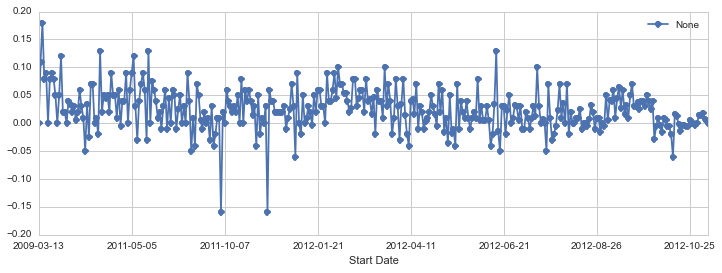

In [30]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-')

##This shows how voters leaned towards either Obama or Romney over time. Obama appears to be in the lead over the last few years. There are two big dips where Romney polled strongly. May want to look into that further... 

In [39]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
print min(xlimit)
print max(xlimit)


329
356


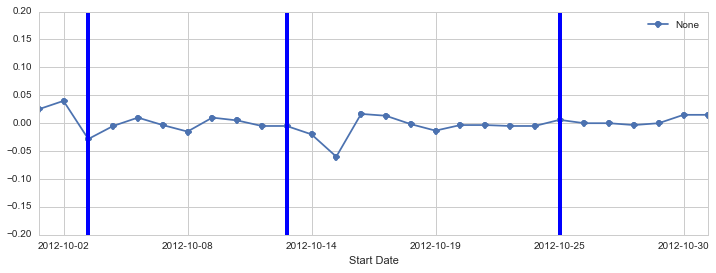

In [42]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', xlim=(329,356))  

# Oct 3rd debate
plt.axvline(x=329+2, linewidth=4)
# Oct 11th debate
plt.axvline(x=329+10, linewidth=4)
# Oct 22nd debate
plt.axvline(x=329+21, linewidth=4)

##The horizontal lines are the three debates that took place. After the first debate, sentiment for Obama went up. After the second debate, sentiment for Romney went up. And, after the third debate, it looks about even. 